### **TOXIC COMMENTS CLASSIFICATION** <br>
##Neural Networks model

Dataset Source: https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data <br>
Dataset uploaded on Google Drive: https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data <br>

In [3]:
# connecting google-drive to colab - to access the files in drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# updating the working directory
%cd /content/drive/Shareddrives/Project/Data

/content/drive/Shareddrives/Project/Data


Import all the libraries required for text pre-processing, visualizations, data analysis and developing machine learning models

In [5]:
# import necessary libraries
# python libraries - for data manipulation
import pandas as pd
import numpy as np
import os
import string
from string import punctuation
from collections import Counter
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# natural language processing libraries - for NLP tasks: text pre-processing
import nltk
from nltk import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***Pre-processing***

In [6]:
# Read data from the train.csv file
df_train = pd.read_csv('/content/drive/Shareddrives/Project/Data/train.csv')

In [7]:
# check a sample of training data
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


From the sample: <br>
The comments data is given in comments_text column with its associated unique comment id in different column. The toxicity level in the comments are categorized into 6 classes: toxic, severe_toxic, obscene, threat, insult and identity_hate.

---




To make the data consistent, the following text mining techniques are being used: removal of punctuations and stop-words, stemming.

In [8]:
#remove punctuations from the text in comments
def punctuation(sentence):
  # convert every letter in the sentences which is not punctuation to lower alphabets - to maintain text consistency
    comment_text = [letters.lower() for letters in sentence if letters not in string.punctuation ]
  # join the words after elimination of punctuations
    comment_text = ''.join(comment_text)
    return comment_text

df_train['comment_text'] = df_train['comment_text'].apply(punctuation)
df_train['comment_text'].head()

0    explanation\nwhy the edits made under my usern...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    \nmore\ni cant make any real suggestions on im...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

Result: the words in the sentences are converted to lower alphabets and all punctuations in the sentences are eliminated

In [9]:
#removing stopwords(insignificant words) from the comments_text
new_stopwords = nltk.corpus.stopwords.words('english')

def stopwords(sentence):
    comment_text = [words for words in sentence.split() if words not in new_stopwords]
    comment_text = ' '.join(comment_text)
    return comment_text

df_train['comment_text'] = df_train['comment_text'].apply(stopwords)
df_train['comment_text'].head()

0    explanation edits made username hardcore metal...
1    daww matches background colour im seemingly st...
2    hey man im really trying edit war guy constant...
3    cant make real suggestions improvement wondere...
4                  sir hero chance remember page thats
Name: comment_text, dtype: object

Result: The words which are repeated and not adding any weight/value to the determination of toxicity level are removed.

In [10]:
#stemming: reducing the words to their root words
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language='english')
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_train['comment_text'].head()

0    explan edit made usernam hardcor metallica fan...
1    daww match background colour im seem stuck tha...
2    hey man im realli tri edit war guy constant re...
3    cant make real suggest improv wonder section s...
4                      sir hero chanc rememb page that
Name: comment_text, dtype: object

Result: stemming is performed on each word in a sentence and is converted to its base word. <br>
Note: SnowballStemmer supports other languages as well. However, since most of the text in comments is in english, the same is given as hyper-paramater for the function.

***Exploratory Data Analysis***

In [11]:
# comment_text - input
# text_labels - output
X = df_train['comment_text']
y = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [12]:
# Find number of unique words in overall training data
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
158501


Result: Out of 159k rows(appx.) of comments, there are only 158,501 unique words

In [13]:
# Find avergae comment length
print("Comment length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Comment length: 
Mean 224.87 words (351.884460)


Result: Each comment in the given training data seems to contain ~225 words in a sentence

                        word  count
0   (nigger, nigger, nigger)   2010
1         (fuck, fuck, fuck)   1694
2            (hi, moron, hi)   1468
3         (moron, hi, moron)   1466
4  (criteria, speedi, delet)   1437


<Axes: xlabel='count', ylabel='word'>

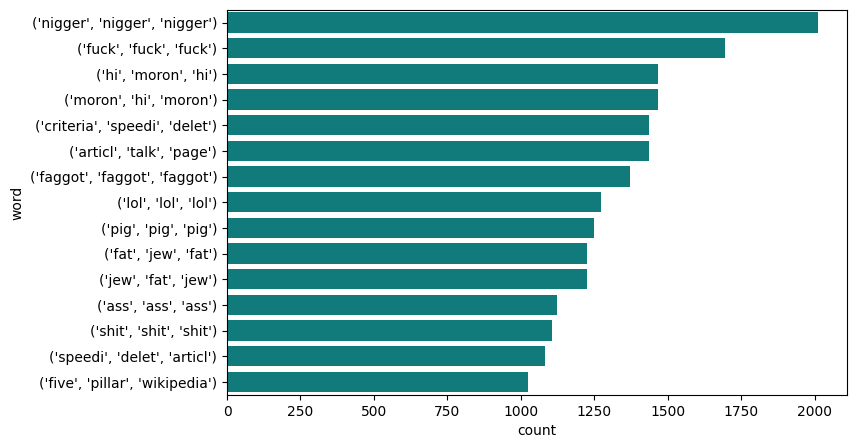

In [14]:
# n-gram analysis: to check most repeated combination of words

# Join all the comments/rows as one string
texts = ' '.join(df_train['comment_text'])
string = texts.split(" ")

def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (8,5))
    return sns.barplot(x='count',y='word', data=n_gram_df,color ='darkcyan', )
draw_n_gram(string,3) # 3 words together


The n-gram shows how many times the words are used together in the apprx. 159k comments

***Modeling***

In [15]:
# import libraries for neural networks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score
!pip install scikeras
from scikeras.wrappers import KerasClassifier
import string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# CNN MODEL
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_train.comment_text)
embedding_dim = 50
maxlen = 150


accuracy_list = []

# train test Split
x_train, x_test, y_train, y_test = train_test_split(df_train['comment_text'], df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],test_size=0.2, random_state=0)
# test validation split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,test_size=0.2, random_state=42)

# tokenization of input training data
x_train1 = tokenizer.texts_to_sequences(x_train)
x_valid1 = tokenizer.texts_to_sequences(x_valid)
x_test1 = tokenizer.texts_to_sequences(x_test)

x_train1 = pad_sequences(x_train1, padding='post', maxlen=maxlen)
x_valid1 = pad_sequences(x_valid1, padding='post', maxlen=maxlen)
x_test1 = pad_sequences(x_test1, padding='post', maxlen=maxlen)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=5)

# create layers for CNN
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           10678850  
                                                                 
 conv1d (Conv1D)             (None, 150, 64)           9664      
                                                                 
 conv1d_1 (Conv1D)           (None, 150, 64)           12352     
                                                                 
 max_pooling1d (MaxPooling1  (None, 75, 64)            0         
 D)                                                              
                                                                 
 conv1d_2 (Conv1D)           (None, 75, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 75, 128)           49280     
                                                        

By fine-tuning the CNN layers and hyper-parameters of the model, the model performance and accuracy to classify and predict the probability of each label can be improved.

In [18]:
# Train the CNN model
model.fit(x_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(x_valid1,y_valid),callbacks=[callback])

Epoch 1/10
399/399 [==============================] - 332s 828ms/step - loss: 0.0905 - accuracy: 0.8000 - val_loss: 0.0520 - val_accuracy: 0.9959
Epoch 2/10
399/399 [==============================] - 314s 786ms/step - loss: 0.0493 - accuracy: 0.9492 - val_loss: 0.0509 - val_accuracy: 0.9959
Epoch 3/10
399/399 [==============================] - 319s 799ms/step - loss: 0.0436 - accuracy: 0.9726 - val_loss: 0.0553 - val_accuracy: 0.9959
Epoch 4/10
399/399 [==============================] - 320s 803ms/step - loss: 0.0381 - accuracy: 0.9647 - val_loss: 0.0562 - val_accuracy: 0.9956
Epoch 5/10
399/399 [==============================] - 315s 790ms/step - loss: 0.0340 - accuracy: 0.9449 - val_loss: 0.0641 - val_accuracy: 0.9956
Epoch 6/10
399/399 [==============================] - 311s 779ms/step - loss: 0.0313 - accuracy: 0.8623 - val_loss: 0.0703 - val_accuracy: 0.9949
Epoch 7/10
399/399 [==============================] - 314s 787ms/step - loss: 0.0284 - accuracy: 0.7227 - val_loss: 0.0844 -

From the metric values of each epoch, it is observed that the training of the model is not consistent and should be improved.

In [19]:
# Binary prediction

predicted_labels = model.predict(x_test1)
# Convert probabilities to binary predictions
binary_predictions = (predicted_labels > 0.5).astype(int)

accuracy = accuracy_score(y_test, binary_predictions)
accuracy_list.append(accuracy)
print(f'Accuracy: {accuracy}')


998/998 [==============================] - 24s 24ms/step
Accuracy: 0.9122669591101363


Although CNN is a good choice for the application in text classification, the required knowledge of fine-tuning the hyper-parameters and CNN layers is important to develop a model with better accuracy and prediction performance.